In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징을 두드러지게 한다.
from tensorflow.keras.layers import Conv2D
# MaxPooling : 불필요한 부분을 제거하는 역할을 한다
from tensorflow.keras.layers import MaxPool2D
# Flatten : CNN, MaxPooling은 2차원 데이터를 사용하고 출력하기 때문에
# 1차원 데이터로 변하는 것을 사용해야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 노드의 일부를 on/off 하면서 과적합을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 원핫 인코딩하고 차원축소를 한다.
from tensorflow.keras.layers import Embedding
# 문장 학습을 위한 RNN(LSTM)
from tensorflow.keras.layers import LSTM
# Cnn1D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D


# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원한다.
from tensorflow.keras.models import load_model

# epoch 마다 저장을 하기 위해 사용한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단을 위해 사용한다.
from tensorflow.keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장의 데이터의 단어 데이터 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence


# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 로이터 데이터를 불러온다.
# 이 데이터는 이미 토큰화와 숫자 변환이 완료된 데이터이다.
from tensorflow.keras.datasets import reuters


In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000,
                                                        test_split=0.2)
# 각 기사 하나당 단어 수 1000개만

In [4]:
# 결과 데이터 확인
# 결과 데이터는 0부터 1씩 증가한다
pd.Series(y_train).value_counts().sort_index() # 기사 별 단어의 수

0       55
1      432
2       74
3     3159
4     1949
5       17
6       48
7       16
8      139
9      101
10     124
11     390
12      49
13     172
14      26
15      20
16     444
17      39
18      66
19     549
20     269
21     100
22      15
23      41
24      62
25      92
26      24
27      15
28      48
29      19
30      45
31      39
32      32
33      11
34      50
35      10
36      49
37      19
38      19
39      24
40      36
41      30
42      13
43      21
44      12
45      18
dtype: int64

In [5]:
# 카테고리 개수
a1 = len(pd.Series(y_train).value_counts())
print(f'결과데이터 종류 수 : {a1}')

# 학습용 뉴스 기사 개수
a2 = len(X_train)
print(f'학습용 뉴스 기사 개수 : {a2}')

# 테스트용 뉴스 기사 개수
a3 = len(X_test)
print(f'테스트용 뉴스 기사 개수 : {a3}')


결과데이터 종류 수 : 46
학습용 뉴스 기사 개수 : 8982
테스트용 뉴스 기사 개수 : 2246


In [6]:
print(X_train[0])


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
print(len(X_train[0]))
print(len(X_train[1])) 
# 기사 마다 단어의 개수 다름

87
56


In [8]:
# 각 문장의 단어수가 다르므로 이를 똑같이 맞춰준다.
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

print(len(X_train[0]))
print(len(X_test[0]))


2376
1032


In [9]:
# 결과 데이터를 원핫 인코딩한다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
# 모델 설정
model = Sequential()

# 문장당 최대 1000개의 데이터를 100개로 압축한다.
model.add(Embedding(1000, 100))
model.add(Dropout(0.5))

# CNN
model.add(Conv1D(64, kernel_size=3))
model.add(Activation('relu'))

model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))



# RNN(LSTM) -> 위에서 100으로 압축했기 때문에 노드의 수는
# 100을 설정한다.
model.add(LSTM(100))
model.add(Activation('tanh'))

# 출력층 -> 결과데이터의 종류가 46개이므로..
model.add(Dense(46))
model.add(Activation('softmax'))


In [11]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [12]:
with tf.device('/CPU:0') :
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   batch_size=2000, epochs=20)


Epoch 1/20
5/5 [==============================] - 233s 43s/step - loss: 3.7983 - accuracy: 0.1983 - val_loss: 3.7281 - val_accuracy: 0.3620
Epoch 2/20
5/5 [==============================] - 245s 49s/step - loss: 3.5871 - accuracy: 0.3517 - val_loss: 3.2147 - val_accuracy: 0.3620
Epoch 3/20
5/5 [==============================] - 260s 51s/step - loss: 2.8589 - accuracy: 0.3517 - val_loss: 2.5897 - val_accuracy: 0.3620
Epoch 4/20
5/5 [==============================] - 260s 52s/step - loss: 2.5381 - accuracy: 0.3517 - val_loss: 2.5039 - val_accuracy: 0.3620
Epoch 5/20
5/5 [==============================] - 268s 49s/step - loss: 2.4741 - accuracy: 0.3517 - val_loss: 2.4677 - val_accuracy: 0.3620
Epoch 6/20
5/5 [==============================] - 273s 54s/step - loss: 2.4369 - accuracy: 0.3517 - val_loss: 2.4384 - val_accuracy: 0.3620
Epoch 7/20
5/5 [==============================] - 302s 60s/step - loss: 2.4145 - accuracy: 0.3517 - val_loss: 2.4230 - val_accuracy: 0.3620
Epoch 8/20
5/5 [====

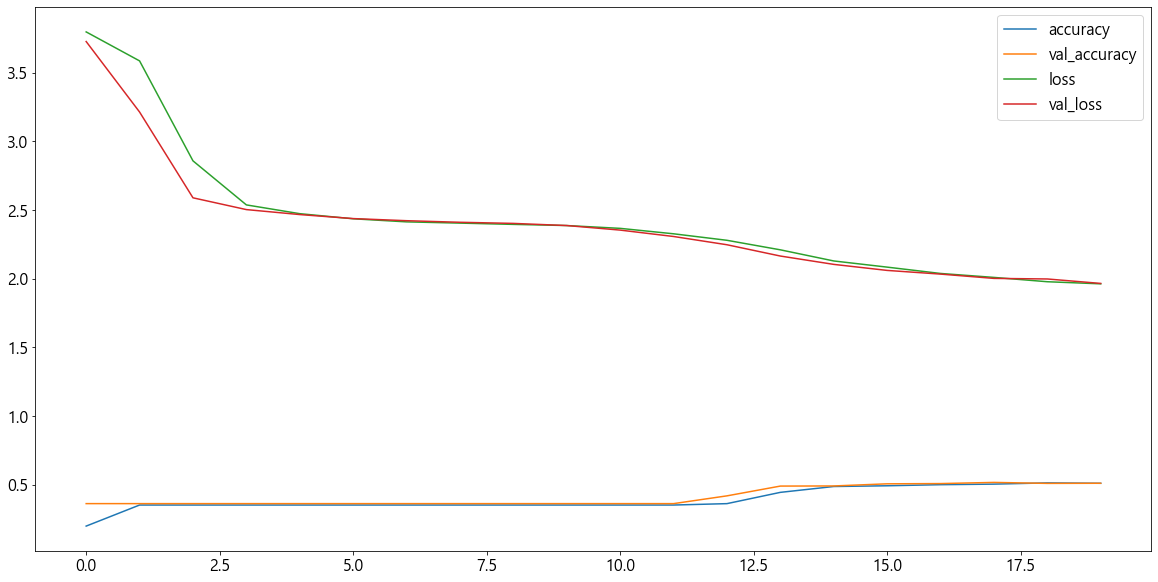

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
